In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
d4=pd.read_csv('mushroom.csv')
d4.head()
d4=d4.astype('str')
type(d4)

pandas.core.frame.DataFrame

In [3]:
d4.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
d4.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in d4.columns:
    d4[i]=le.fit_transform(d4[i])

In [6]:
d4.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [7]:
d4.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [8]:
#veil-type column is showing only 0 values.So it can be dropped

In [9]:
d4.drop('veil-type',axis=1,inplace=True)

In [10]:
d4.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [11]:
#there are no null values in this dataset

In [12]:
d4.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.575086,1.603644,5.816347,5.794682,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.621459,0.675974,1.901747,1.907291,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,1.000000,6.000000,6.000000,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,2.000000,7.000000,7.000000,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,3.000000,8.000000,8.000000,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


In [13]:
#there are 8124 rows in this dataset
#median is greater than mean for cap surface,odor,gill attachment,gill colour etc,that means they are left skewed datas
#there is some difference between 75% and maximum for odor,gill color,habitat etc..so there are chances for presence of outliers

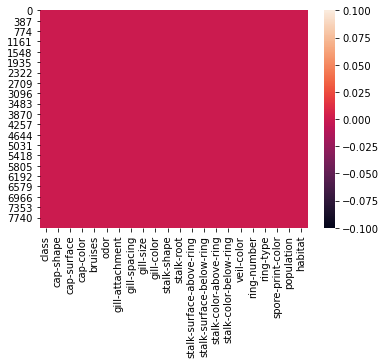

In [14]:
sns.heatmap(d4.isnull())

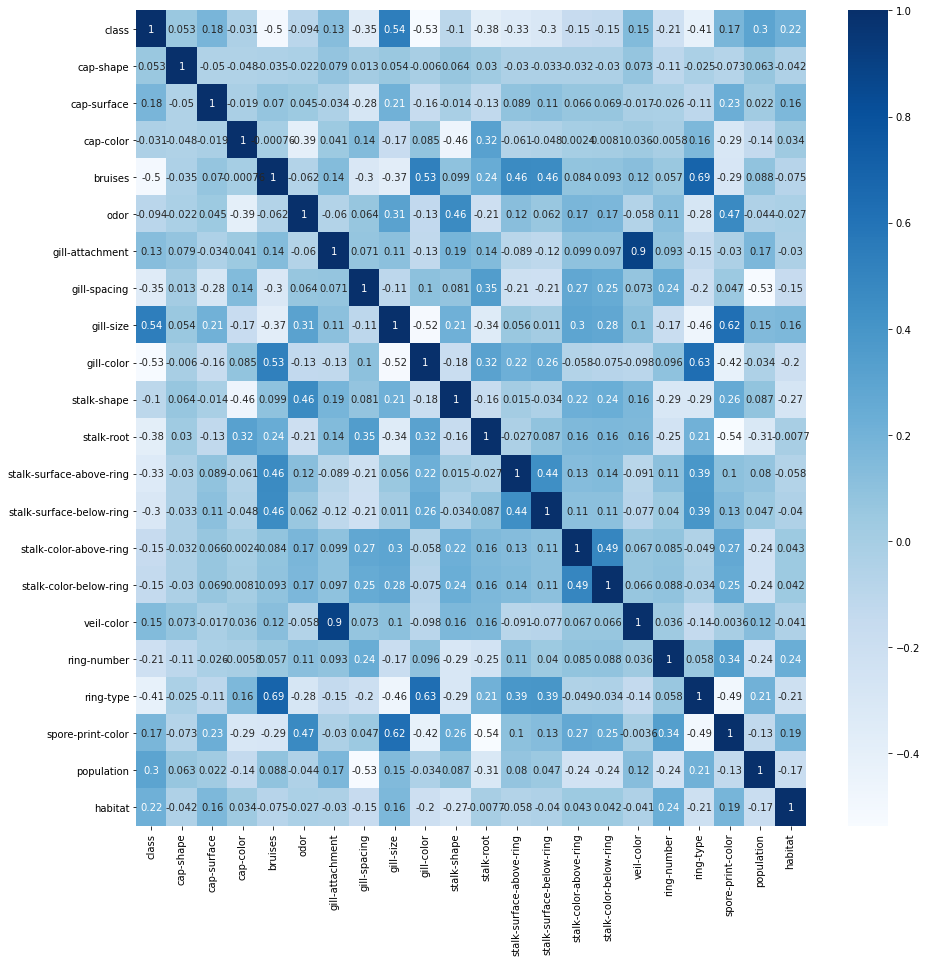

In [15]:
d4cor=d4.corr()
plt.figure(figsize=(15,15))
sns.heatmap(d4cor,cmap='Blues',annot=True)

In [16]:
#class is having a strong negative relation with ring type,gill colour and bruises
#class has strong positive relation with gill size

In [17]:
collist=d4.columns.values
ncol=22
nrows=8

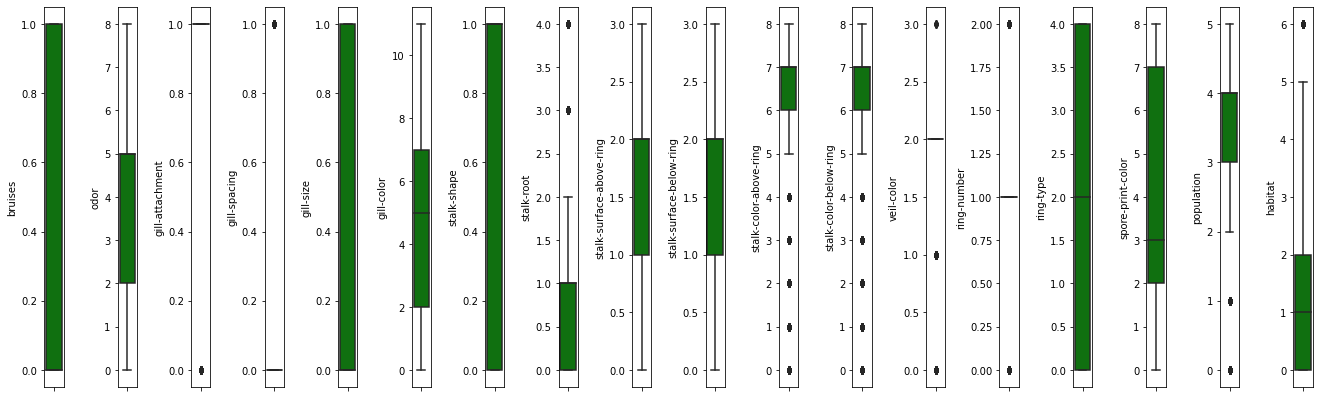

In [18]:
plt.figure(figsize=(ncol,2*ncol))
for i in range(4,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(d4[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [19]:
d4.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [20]:
#gill attachment,veil color,ring number are highly skewed datas

In [21]:
for col in d4.columns:
    if d4.skew().loc[col]>0.55:
        d4[col]=np.log1p(d4[col])

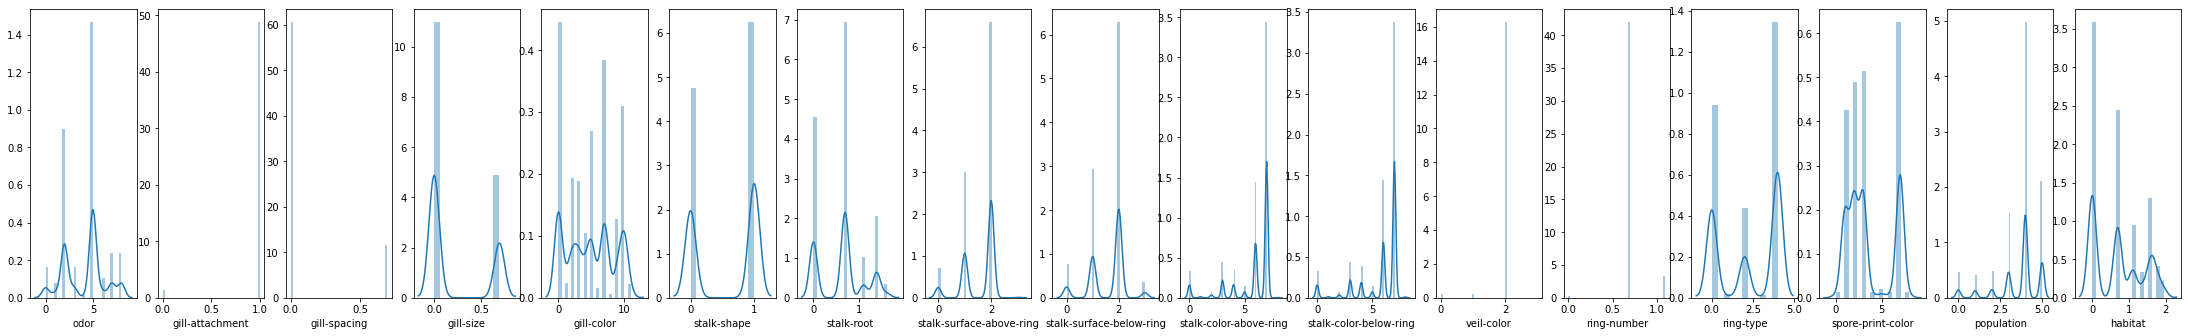

In [22]:
plt.figure(figsize=(50,50))
for i in range(5,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(d4[collist[i]])

In [23]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(d4))
z

array([[1.0366127 , 1.02971224, 0.14012794, ..., 0.67019486, 0.5143892 ,
        1.66538931],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.2504706 , 1.31310821,
        0.00952861],
       [0.96468045, 2.08704716, 0.14012794, ..., 0.2504706 , 1.31310821,
        1.04722694],
       ...,
       [0.96468045, 0.8403434 , 0.14012794, ..., 1.50964337, 2.11182722,
        0.60863376],
       [1.0366127 , 0.21699152, 0.95327039, ..., 1.42842641, 0.28432981,
        0.60863376],
       [0.96468045, 1.02971224, 0.14012794, ..., 0.16925365, 2.11182722,
        0.60863376]])

In [24]:
threshold=3
print(np.where(z>3))

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64), array([15, 14, 15, ..., 16,  6, 16], dtype=int64))


In [25]:
d4_new=d4[(z<3).all(axis=1)]
print(d4.shape)
print(d4_new.shape)

(8124, 22)
(6472, 22)


In [26]:
#nearly 1600 rows are deleted due to presence of outliers

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [28]:
x=d4_new.iloc[:,1:]
x

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,1.609438,1,6,1,0.000000,0.693147,4,0,...,2,2,7,7,2,0.693147,4,2,3,1.791759
1,5,2,2.302585,1,0,1,0.000000,0.000000,4,0,...,2,2,7,7,2,0.693147,4,3,2,0.693147
2,0,2,2.197225,1,3,1,0.000000,0.000000,5,0,...,2,2,7,7,2,0.693147,4,3,2,1.386294
3,5,3,2.197225,1,6,1,0.000000,0.693147,5,0,...,2,2,7,7,2,0.693147,4,2,3,1.791759
4,5,2,1.386294,0,5,1,0.693147,0.000000,4,1,...,2,2,7,7,2,0.693147,0,3,0,0.693147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8113,3,3,1.098612,0,8,1,0.000000,0.693147,0,1,...,1,1,6,6,2,0.693147,0,7,4,0.000000
8116,3,3,1.609438,0,7,1,0.000000,0.693147,0,1,...,2,1,6,7,2,0.693147,0,7,4,1.098612
8117,3,2,1.098612,0,8,1,0.000000,0.693147,0,1,...,1,2,6,7,2,0.693147,0,7,4,0.000000
8118,3,3,1.609438,0,2,1,0.000000,0.693147,0,1,...,1,2,6,7,2,0.693147,0,7,4,0.000000


In [29]:
y=d4_new.iloc[:,0]
y

0       1
1       0
2       0
3       1
4       0
       ..
8113    1
8116    1
8117    1
8118    1
8122    1
Name: class, Length: 6472, dtype: int32

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 1.01094117,  0.11946473,  0.01075677, ..., -0.71798868,
        -0.60737669,  1.8023166 ],
       [ 1.01094117,  0.11946473,  1.68531821, ..., -0.27014532,
        -1.450203  ,  0.09786347],
       [-2.17756333,  0.11946473,  1.43077969, ..., -0.27014532,
        -1.450203  ,  1.17325366],
       ...,
       [-0.26446063,  0.11946473, -1.2233374 , ...,  1.52122814,
         0.23544963, -0.97752673],
       [-0.26446063,  0.93162408,  0.01075677, ...,  1.52122814,
         0.23544963, -0.97752673],
       [-0.26446063,  0.93162408,  0.01075677, ...,  1.52122814,
         0.23544963,  0.72692641]])

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
dtc=  DecisionTreeClassifier()

max_score=0
for r_state in range(40,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
   
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_score:
        max_score=acc_scr
        final_r_state=r_state
print("max accuracy score corresponding to",final_r_state,"is",max_score)

max accuracy score corresponding to 40 is 1.0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [33]:
lr=LogisticRegression()

In [34]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.964185393258427
[[716  33]
 [ 18 657]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       749
           1       0.95      0.97      0.96       675

    accuracy                           0.96      1424
   macro avg       0.96      0.96      0.96      1424
weighted avg       0.96      0.96      0.96      1424



In [35]:
#AUC-ROC CURVE
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [36]:
y_pred_prob=lr.predict_proba(x_test)[:,1]
y_pred_prob

array([9.60237955e-10, 8.95865904e-04, 9.99939579e-01, ...,
       9.99995369e-01, 9.22141854e-03, 8.25410928e-01])

In [37]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [38]:
fpr

array([0.        , 0.        , 0.        , 0.00267023, 0.00267023,
       0.00400534, 0.00400534, 0.00667557, 0.00667557, 0.00934579,
       0.00934579, 0.01201602, 0.01201602, 0.01335113, 0.01335113,
       0.01468625, 0.01468625, 0.01602136, 0.01602136, 0.01735648,
       0.01735648, 0.01869159, 0.01869159, 0.0200267 , 0.0200267 ,
       0.02269693, 0.02269693, 0.02403204, 0.02403204, 0.02536716,
       0.02536716, 0.02670227, 0.02670227, 0.02803738, 0.02803738,
       0.0293725 , 0.0293725 , 0.03070761, 0.03070761, 0.03204272,
       0.03204272, 0.03337784, 0.03337784, 0.03604806, 0.03604806,
       0.03871829, 0.03871829, 0.0400534 , 0.0400534 , 0.04138852,
       0.04138852, 0.04272363, 0.04272363, 0.04405874, 0.04405874,
       0.04806409, 0.04806409, 0.0493992 , 0.0493992 , 0.05206943,
       0.05206943, 0.05340454, 0.05340454, 0.05473965, 0.05473965,
       0.05607477, 0.05607477, 0.05874499, 0.05874499, 0.06141522,
       0.06141522, 0.06809079, 0.06809079, 0.08277704, 0.08277

In [39]:
tpr

array([0.        , 0.00148148, 0.32296296, 0.32296296, 0.33037037,
       0.33037037, 0.33333333, 0.33333333, 0.34074074, 0.34074074,
       0.34222222, 0.34222222, 0.34666667, 0.34666667, 0.35259259,
       0.35259259, 0.36888889, 0.36888889, 0.38814815, 0.38814815,
       0.87851852, 0.87851852, 0.88888889, 0.88888889, 0.91259259,
       0.91259259, 0.91407407, 0.91407407, 0.91703704, 0.91703704,
       0.92296296, 0.92296296, 0.92740741, 0.92740741, 0.92888889,
       0.92888889, 0.93185185, 0.93185185, 0.93777778, 0.93777778,
       0.9437037 , 0.9437037 , 0.94518519, 0.94518519, 0.94666667,
       0.94666667, 0.94962963, 0.94962963, 0.95407407, 0.95407407,
       0.95555556, 0.95555556, 0.96148148, 0.96148148, 0.97481481,
       0.97481481, 0.97777778, 0.97777778, 0.97925926, 0.97925926,
       0.98222222, 0.98222222, 0.98666667, 0.98666667, 0.98814815,
       0.98814815, 0.98962963, 0.98962963, 0.99111111, 0.99111111,
       0.99259259, 0.99259259, 0.99407407, 0.99407407, 0.99555

In [40]:
thresholds

array([1.99999976e+00, 9.99999759e-01, 9.99740572e-01, 9.99666389e-01,
       9.99536713e-01, 9.99426293e-01, 9.99418393e-01, 9.99393030e-01,
       9.99174750e-01, 9.99124594e-01, 9.99072414e-01, 9.99016880e-01,
       9.98662374e-01, 9.98654453e-01, 9.98460677e-01, 9.98457884e-01,
       9.97506057e-01, 9.97433509e-01, 9.96593645e-01, 9.96489422e-01,
       8.16416465e-01, 8.12650772e-01, 7.91898550e-01, 7.85623008e-01,
       7.44118499e-01, 7.41623387e-01, 7.39924379e-01, 7.37833095e-01,
       7.30767299e-01, 7.27318952e-01, 7.18739786e-01, 7.10586197e-01,
       6.94674852e-01, 6.92771709e-01, 6.79853755e-01, 6.77735725e-01,
       6.71544987e-01, 6.69885493e-01, 6.43717437e-01, 6.39869864e-01,
       6.26186514e-01, 6.23909843e-01, 6.17228931e-01, 6.07669456e-01,
       6.02235075e-01, 5.84479738e-01, 5.72803714e-01, 5.71055041e-01,
       5.68551421e-01, 5.65677223e-01, 5.63074821e-01, 5.60737610e-01,
       5.56028521e-01, 5.40241640e-01, 4.97191934e-01, 4.80760855e-01,
      

<function matplotlib.pyplot.show(*args, **kw)>

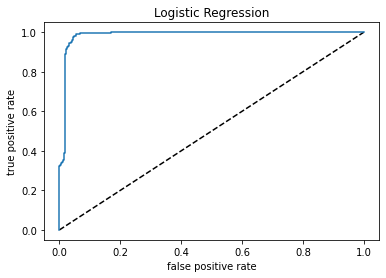

In [41]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show

In [42]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9646372941700045


In [43]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.8742977528089888
[[707  42]
 [137 538]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       749
           1       0.93      0.80      0.86       675

    accuracy                           0.87      1424
   macro avg       0.88      0.87      0.87      1424
weighted avg       0.88      0.87      0.87      1424



In [44]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[749   0]
 [  0 675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424



In [45]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[749   0]
 [  0 675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424



In [46]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

1.0
[[749   0]
 [  0 675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424



In [47]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

1.0
[[749   0]
 [  0 675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424



<function matplotlib.pyplot.show(*args, **kw)>

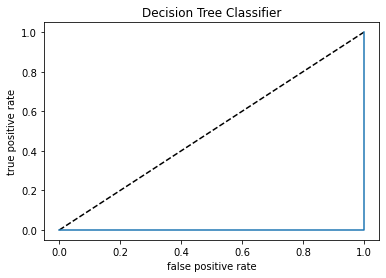

In [48]:
#Decision tree curve
y_pred_prob=dtc.predict_proba(x_test)[:,0]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show

In [49]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
print(auc_score)

0.9646372941700045


In [50]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

1.0
[[749   0]
 [  0 675]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       749
           1       1.00      1.00      1.00       675

    accuracy                           1.00      1424
   macro avg       1.00      1.00      1.00      1424
weighted avg       1.00      1.00      1.00      1424



In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
lrscores=cross_val_score(lr,x,y,cv=5)
print(lrscores)
print(lrscores.mean(),lrscores.std())

[0.7969112  0.92432432 0.9675425  1.         0.93508501]
0.9247726065654968 0.06920045013056102


In [53]:
gnbscores=cross_val_score(gnb,x,y,cv=5)
print(gnbscores)
print(gnbscores.mean(),gnbscores.std())

[0.65868726 0.65250965 0.92117465 1.         0.92581144]
0.8316366001682848 0.14644462109368847


In [54]:
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.8023166  1.         1.         1.         0.93972179]
0.9484076790413729 0.07668552674726417


In [55]:
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.9011583  1.         1.         1.         0.92581144]
0.9653939477123403 0.04309461677606957


In [56]:
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.8023166  0.9969112  1.         1.         0.94435858]
0.94871727545607 0.07620320869525751


In [57]:
import joblib
joblib.dump(dtc,'dtc_mushroom.pkl')

['dtc_mushroom.pkl']